In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Aktualizacja parametrów rc, aby korzystać z LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb}"
})

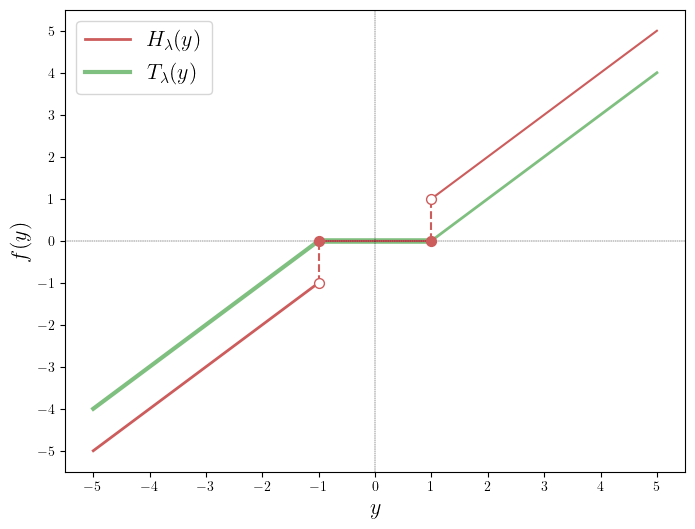

In [2]:
# Definicje funkcji twardego i miękkiego progowania
def H_lambda(x, lambda_val):
    return np.where(np.abs(x) >= lambda_val, x, 0)

def T_lambda(x, lambda_val):
    return np.sign(x) * np.maximum(np.abs(x) - lambda_val, 0)

# Parametry
lambda_val = 1
# Ciągły zakres wartości x z pominięciem punktów nieciągłości
x_left = np.linspace(-5, -1, 500)
x_right = np.linspace(1, 5, 500)

# Obliczenie wartości funkcji
H_left = H_lambda(x_left, lambda_val)
H_right = H_lambda(x_right, lambda_val)
T_left = T_lambda(x_left, lambda_val)
T_right = T_lambda(x_right, lambda_val)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))

# Wykres twardego progowania
plt.plot(x_left, H_left, color='indianred', label=r"$H_\lambda(y)$", linewidth=2)
plt.plot(x_right, H_right, color='indianred', linewidth=1.5)

# Wykres miękkiego progowania
plt.plot(x_left, T_left, color='green', label=r"$T_\lambda(y)$", linewidth=3, alpha=0.5)
plt.plot(x_right, T_right, color='green', linewidth=2, alpha=0.5)

# Linia na osi x
plt.plot([-1, 1], [0, 0], color='green', linewidth=4, alpha=0.5)
plt.plot([-1, 1], [0, 0], color='indianred', linewidth=1.5)

# Dodanie pionowych linii przerywanych w określonych punktach y
plt.vlines(-1, ymin=-1, ymax=0, color='indianred', linestyle='--', linewidth=1.5)
plt.vlines(1, ymin=0, ymax=1, color='indianred', linestyle='--', linewidth=1.5)

# Dodanie pustych i pełnych punktów w (-1, -1), (-1, 0), (1, 1), (1, 0)
plt.scatter(-1, -1, color='white', edgecolor='indianred', s=50, zorder=5)
plt.scatter(-1, 0, color='indianred', s=50, zorder=6)
plt.scatter(1, 1, color='white', edgecolor='indianred', s=50, zorder=5)
plt.scatter(1, 0, color='indianred', s=50, zorder=6)

# Dodanie osi poziomej i pionowej
plt.axhline(0, color='black', linewidth=0.3, linestyle='--')
plt.axvline(0, color='black', linewidth=0.3, linestyle='--')

# Ustawienie znaczników co 1 jednostkę
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))

# Etykiety osi i legenda
plt.xlabel(r"$y$", fontsize=16)
plt.ylabel(r"$f(y)$", fontsize=16)
plt.legend(fontsize=16)

# Utworzenie folderu do zapisu wykresu
os.makedirs("zdjecia_symulacji", exist_ok=True)

# Zapisanie wykresu jako plik SVG w folderze "zdjecia_symulacji"
plt.savefig("zdjecia_symulacji/estymatory_progowania.svg", format="svg", bbox_inches='tight', pad_inches=0)

# Wyświetlenie wykresu
plt.show()